In [3]:
import numpy as np
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from random import *
from regions import entire_region
%matplotlib inline

In [58]:
region  =  entire_region(1000)

In [115]:
X = [[row[0], row[1]] for row in region]
X = np.array(X)
y = [row[2] for row in region]
y = np.array(y)

oh = OneHotEncoder()
y_oh = oh.fit_transform(y.reshape(-1,1)).toarray()

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y_oh, test_size=0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state = 0)

from keras.losses import BinaryCrossentropy

In [90]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 16, kernel_initializer="glorot_uniform", activation = 'relu'))
classifier.add(Dense(units = 8, kernel_initializer="glorot_uniform", activation = 'relu'))
classifier.add(Dense(8, kernel_initializer="glorot_uniform", activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = classifier.fit(X_train, y_train, batch_size = 32, epochs = 50,validation_data=(X_val, y_val),callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15,min_delta=0.1, verbose=10)])

Epoch 1/50
160/160 [==============================] - 0s 2ms/step - loss: 1.9178 - accuracy: 0.2414 - val_loss: 1.7566 - val_accuracy: 0.3805
Epoch 2/50
160/160 [==============================] - 0s 2ms/step - loss: 1.5548 - accuracy: 0.4074 - val_loss: 1.3739 - val_accuracy: 0.4273
Epoch 3/50
160/160 [==============================] - 0s 2ms/step - loss: 1.2276 - accuracy: 0.5174 - val_loss: 1.1140 - val_accuracy: 0.5789
Epoch 4/50
160/160 [==============================] - 0s 1ms/step - loss: 1.0226 - accuracy: 0.6146 - val_loss: 0.9523 - val_accuracy: 0.6219
Epoch 5/50
160/160 [==============================] - 0s 2ms/step - loss: 0.8865 - accuracy: 0.6576 - val_loss: 0.8360 - val_accuracy: 0.6844
Epoch 6/50
160/160 [==============================] - 0s 2ms/step - loss: 0.7868 - accuracy: 0.6971 - val_loss: 0.7522 - val_accuracy: 0.7047
Epoch 7/50
160/160 [==============================] - 0s 2ms/step - loss: 0.7165 - accuracy: 0.7104 - val_loss: 0.6954 - val_accuracy: 0.7180
Epoch 

In [91]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


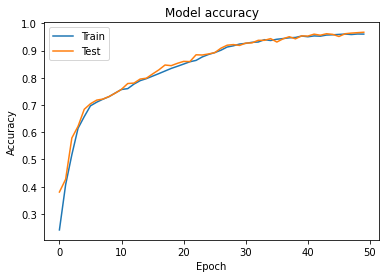

In [92]:
history_dict = history.history
print(history_dict.keys())

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

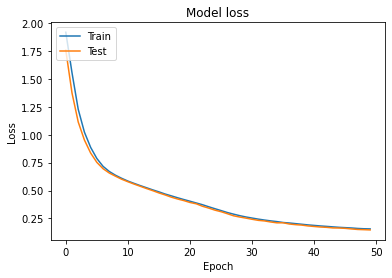

In [93]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [111]:
c = classification_report(y_test, y_pred)
print(c)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       199
           1       0.94      0.92      0.93       215
           2       0.98      0.93      0.96       210
           3       0.95      0.97      0.96       196
           4       0.98      0.96      0.97       201
           5       0.94      0.94      0.94       200
           6       0.97      0.98      0.97       172
           7       0.98      0.99      0.98       207

   micro avg       0.97      0.95      0.96      1600
   macro avg       0.97      0.95      0.96      1600
weighted avg       0.97      0.95      0.96      1600
 samples avg       0.95      0.95      0.95      1600



In [107]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

[[190   0   0   6   3   0   0   0]
 [  7 197   0   0   0  11   0   0]
 [  7   2 195   0   0   0   6   0]
 [  1   0   0 191   0   0   0   4]
 [  8   0   0   0 193   0   0   0]
 [  1  10   0   0   0 189   0   0]
 [  0   0   3   0   0   0 169   0]
 [  0   0   0   3   0   0   0 204]]
